## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

# Fernando Silva Paz - Com a análise desses dados é perceptível que não podemos confiar tão somente em medidas de resumo, como Moda e Mediana, para uma correta interpretação dos dados. Elementos como quantidade de amostras e intervalos de confiança são essenciais para uma correta interpretação

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv", header=0, names = ['filmeId', 'titulo', 'generos'],  index_col = ['filmeId'])

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv', header=0, names = ['usuarioId', 'filmeId', 'nota', 'momento'])

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução
filmes['nota_media'] = notas.groupby("filmeId").mean()["nota"]

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_notas` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme
qte_notas_filme = notas.groupby('filmeId').count()
qte_notas_filme['nota'].head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

In [12]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = qte_notas_filme['nota']
selecao = filmes['total_de_votos'] > 49
filmes = filmes[selecao]

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 1.0, 'Média das notas dos filmes do MovieLens')

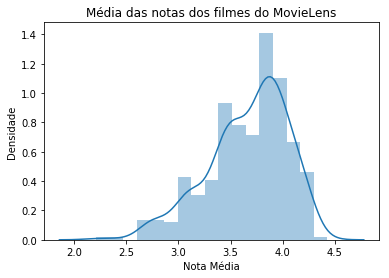

In [14]:
# solução histograma
ax = sns.distplot(filmes['nota_media'])
ax.set(xlabel = 'Nota Média', ylabel = 'Densidade')
ax.set_title('Média das notas dos filmes do MovieLens')

Text(0.5, 1.0, 'Média das notas dos filmes do MovieLens')

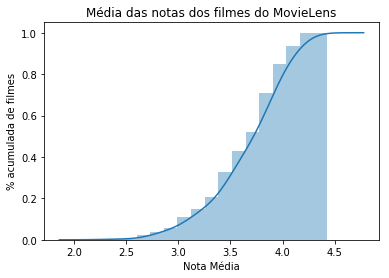

In [15]:
# solução cumulativa
ax = sns.distplot(filmes['nota_media'],
                     hist_kws = {'cumulative': True},
                     kde_kws = {'cumulative': True})
ax.set(xlabel = 'Nota Média', ylabel = '% acumulada de filmes')
ax.set_title('Média das notas dos filmes do MovieLens')

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 1.0, 'Média das notas dos filmes do MovieLens')

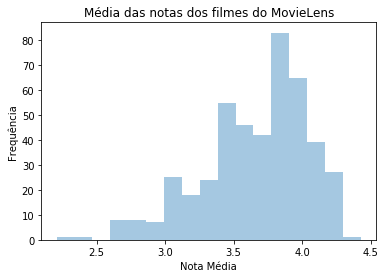

In [16]:
# solução histograma
ax = sns.distplot(filmes['nota_media'], kde = False, norm_hist = False)
ax.set(xlabel = 'Nota Média', ylabel = 'Frequência')
ax.set_title('Média das notas dos filmes do MovieLens')

Text(0.5, 1.0, 'Média das notas dos filmes do MovieLens')

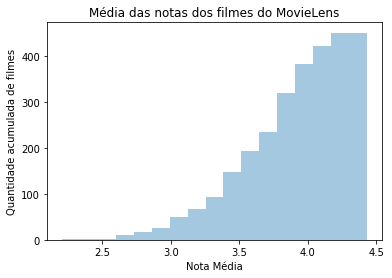

In [17]:
# solução cumulativa
ax = sns.distplot(filmes['nota_media'], norm_hist = False, kde = False,
                     hist_kws = {'cumulative': True},
                     kde_kws = {'cumulative': True})
ax.set(xlabel = 'Nota Média', ylabel = 'Quantidade acumulada de filmes')
ax.set_title('Média das notas dos filmes do MovieLens')

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [18]:
# solução
nota_limite_dos_20_porcento = filmes['nota_media'].quantile(0.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

[Text(0, 0.5, 'Quantidade de filmes'), Text(0.5, 0, 'Gênero')]

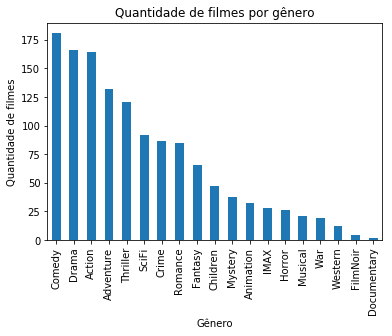

In [22]:
# solução
qtd_genero = generos.sum()
#qtd_genero
qtd_genero_ordenado = qtd_genero.sort_values(ascending=False)
ax = qtd_genero_ordenado.plot(kind = 'bar', title = 'Quantidade de filmes por gênero')
ax.set(xlabel = 'Gênero', ylabel = 'Quantidade de filmes')

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [23]:
# solução
top5_generos_em_quantidade_de_filmes = qtd_genero_ordenado[0:5]

In [24]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
# solucão
votos_por_genero = votos_por_genero_por_filme.sum()
votos_por_genero_ordenado = votos_por_genero.sort_values(ascending=False)
votos_por_genero_ordenado

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

[Text(0, 0.5, 'Votos'), Text(0.5, 0, 'Gênero')]

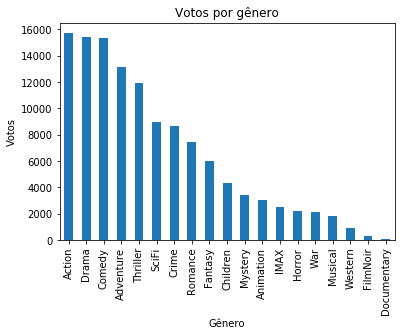

In [27]:
# solução
ax = votos_por_genero_ordenado.plot(kind = 'bar', title = 'Votos por gênero')
ax.set(xlabel = 'Gênero', ylabel = 'Votos')

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [32]:
# solucao código
votos_por_filme_por_genero = votos_por_genero / qtd_genero
votos_por_filme_por_genero_ordenado = votos_por_filme_por_genero.sort_values(ascending=False)
votos_por_filme_por_genero_ordenado

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

[Text(0, 0.5, 'Votos por filme'), Text(0.5, 0, 'Gênero')]

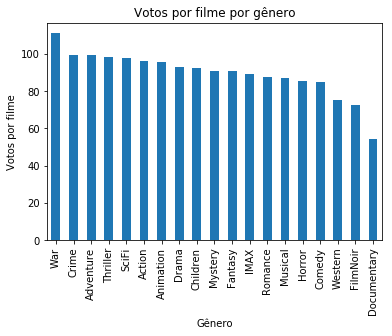

In [33]:
# solução com visualização 
ax = votos_por_filme_por_genero_ordenado.plot(kind = 'bar', title = 'Votos por filme por gênero')
ax.set(xlabel = 'Gênero', ylabel = 'Votos por filme')

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
 O gênro Action tem muito mais filmes e muito mais votos que War. Todavia a relação de votos por filme de War é maior que o de Action.    
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0.5, 1.0, 'Distribuição do total de votos de acordo com o gênero')

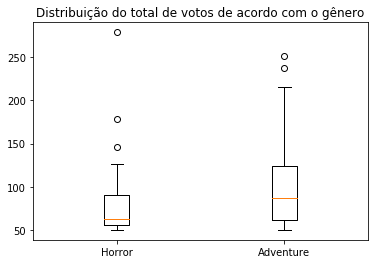

In [66]:
# solução:
import matplotlib.pyplot as plt
plt.boxplot([filmes.query('Horror == 1').total_de_votos, filmes.query('Adventure == 1').total_de_votos], labels = ['Horror', 'Adventure'])
plt.title("Distribuição do total de votos de acordo com o gênero")

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

In [44]:
generos.columns

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'],
      dtype='object')

Text(0.5, 1.0, 'Distribuição do total de votos de acordo com o gênero')

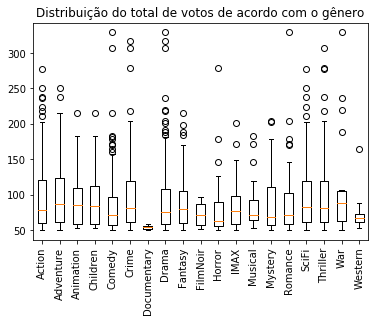

In [57]:
plt.boxplot([filmes.query('Action == 1').total_de_votos, filmes.query('Adventure == 1').total_de_votos, filmes.query('Animation == 1').total_de_votos, filmes.query('Children == 1').total_de_votos, filmes.query('Comedy == 1').total_de_votos, filmes.query('Crime == 1').total_de_votos, filmes.query('Documentary == 1').total_de_votos, filmes.query('Drama == 1').total_de_votos, filmes.query('Fantasy == 1').total_de_votos, filmes.query('FilmNoir == 1').total_de_votos, filmes.query('Horror == 1').total_de_votos, filmes.query('IMAX == 1').total_de_votos, filmes.query('Musical == 1').total_de_votos, filmes.query('Mystery == 1').total_de_votos, filmes.query('Romance == 1').total_de_votos, filmes.query('SciFi == 1').total_de_votos, filmes.query('Thriller == 1').total_de_votos, filmes.query('War == 1').total_de_votos, filmes.query('Western == 1').total_de_votos], labels = generos.columns)
plt.xticks(rotation=90)
plt.title("Distribuição do total de votos de acordo com o gênero")

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
Adventure


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuição total de votos - Adventure')

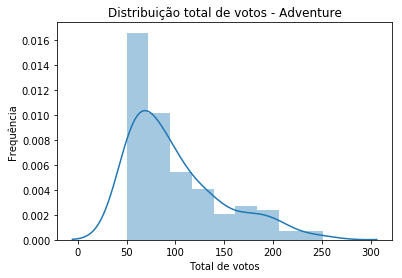

In [71]:
# solucao histograma de aventura
ax = sns.distplot(filmes.query('Adventure == 1')['total_de_votos'])
ax.set(xlabel = 'Total de votos', ylabel = 'Densidade')
ax.set_title('Distribuição total de votos - Adventure')

Text(0.5, 1.0, 'Distribuição total de votos - Horror')

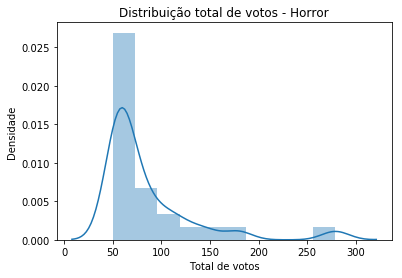

In [72]:
# solucao histograma de horror
ax = sns.distplot(filmes.query('Horror == 1')['total_de_votos'])
ax.set(xlabel = 'Total de votos', ylabel = 'Densidade')
ax.set_title('Distribuição total de votos - Horror')

In [76]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest
stats, p = normaltest(filmes.query('Adventure == 1')['total_de_votos'])
p #se p < 0.05 vamos descartar a hipotese nula, logo não vem de uma curva normal



5.987863006199139e-06

In [62]:
# solução com o teste desejado
from scipy.stats import ranksums

_, p = ranksums(filmes.query('Adventure == 1')['total_de_votos'], filmes.query('Horror == 1')['total_de_votos'])
p

0.04782366231999856

### Solução (explique sua conclusão):
p ~ 0,05 logo não há significância estatistica para recomendar um tipo Adventure ou Horror. 


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 1.0, 'Distribuição da nota média de acordo com o gênero')

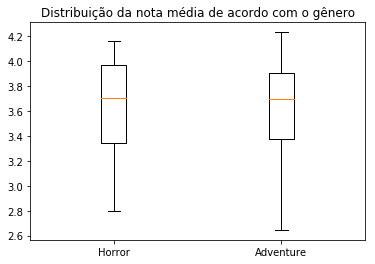

In [65]:
# solução:
plt.boxplot([filmes.query('Horror == 1').nota_media, filmes.query('Adventure == 1').nota_media], labels = ['Horror', 'Adventure'])
plt.title("Distribuição da nota média de acordo com o gênero")

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
Horror


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuição da média dos votos - Adventure')

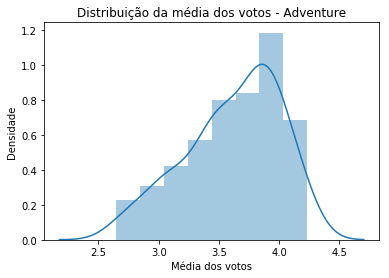

In [73]:
# solucao histograma de aventura
ax = sns.distplot(filmes.query('Adventure == 1')['nota_media'])
ax.set(xlabel = 'Média dos votos', ylabel = 'Densidade')
ax.set_title('Distribuição da média dos votos - Adventure')

Text(0.5, 1.0, 'Distribuição da média dos votos - Horror')

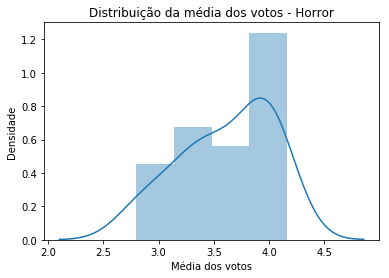

In [77]:
# solucao histograma de horror
ax = sns.distplot(filmes.query('Horror == 1')['nota_media'])
ax.set(xlabel = 'Média dos votos', ylabel = 'Densidade')
ax.set_title('Distribuição da média dos votos - Horror')

In [82]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
stats, p = normaltest(filmes.query('Adventure == 1')['nota_media'])
p

0.012835697582553224

In [83]:
# solução com o teste desejado
_, p = ranksums(filmes.query('Adventure == 1')['nota_media'], filmes.query('Horror == 1')['nota_media'])
p

0.8310397344212459

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Como p>0,05 não há significância estatistica para fazer a recomendação

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

In [84]:
filmes.query('Horror == 1').nota_media.describe()

count    26.000000
mean      3.610527
std       0.419267
min       2.796875
25%       3.346470
50%       3.707704
75%       3.972898
max       4.161290
Name: nota_media, dtype: float64

In [85]:
filmes.query('Adventure == 1').nota_media.describe()

count    132.000000
mean       3.615373
std        0.392217
min        2.645455
25%        3.373580
50%        3.693742
75%        3.904919
max        4.232394
Name: nota_media, dtype: float64

### Solução:
Adventure


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [93]:
votos_por_genero

Action         15734.0
Adventure      13117.0
Animation       3066.0
Children        4331.0
Comedy         15330.0
Crime           8649.0
Documentary      108.0
Drama          15445.0
Fantasy         5993.0
FilmNoir         291.0
Horror          2215.0
IMAX            2492.0
Musical         1822.0
Mystery         3452.0
Romance         7444.0
SciFi           8989.0
Thriller       11907.0
War             2113.0
Western          900.0
dtype: float64

In [94]:
# solução: calculando os 2 generos mais votados
votos_por_genero_ordenado[0:2]

Action    15734.0
Drama     15445.0
dtype: float64

In [139]:
# solução: encontrando os top 5 filmes desses generos
top_action = filmes.query('Action == 1').nota_media.sort_values(ascending=False)[0:5]
top_Drama = filmes.query('Drama == 1').nota_media.sort_values(ascending=False)[0:5]
top = top_action.append(top_Drama)
selecao = filmes.index.isin(top.sort_values(ascending=False)[0:6].index)
filmes_selecao = filmes[selecao]
filmes_selecao[['titulo', 'nota_media', 'total_de_votos']]

,titulo,nota_media,total_de_votos
filmeId,,,
318,"Shawshank Redemption, The (1994)",4.429022,317.0
858,"Godfather, The (1972)",4.289062,192.0
1221,"Godfather: Part II, The (1974)",4.259690,129.0
1276,Cool Hand Luke (1967),4.271930,57.0
2959,Fight Club (1999),4.272936,218.0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [153]:
# solucao
abs(filmes.corr().nota_media).sort_values(ascending=False).head()

# RESPOSTA: São os gêneros Drama e Comedy

nota_media        1.000000
total_de_votos    0.342584
Drama             0.277662
Comedy            0.256005
Crime             0.190220
Name: nota_media, dtype: float64

## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [159]:
# solucao
abs(filmes.corr().total_de_votos).sort_values(ascending=False).head()
#abs(filmes.corr().total_de_votos).sort_values(ascending=True).head()

# RESPOSTA: Os de maior correlação são Comedy e Adventure e os de menor correlação são Children e Mystery

total_de_votos    1.000000
nota_media        0.342584
Comedy            0.128527
Adventure         0.104380
War               0.087999
Name: total_de_votos, dtype: float64

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

Text(0.5, 1.0, 'Relacionamento entre ano de lançamento e nota média')

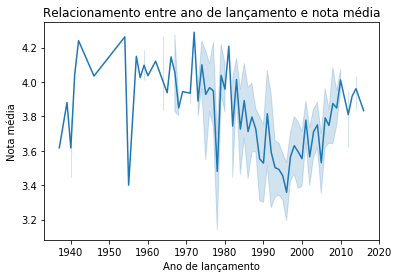

In [180]:
# solucao
ax = sns.lineplot(x = 'ano_de_lancamento', y = 'nota_media', data = filmes)
ax.set(xlabel = 'Ano de lançamento', ylabel = 'Nota média')
ax.set_title('Relacionamento entre ano de lançamento e nota média')

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [179]:
# solução (código)
filmes.corr().nota_media[filmes.corr().index == 'ano_de_lancamento']

ano_de_lancamento   -0.159146
Name: nota_media, dtype: float64

### Solução (explicação)
Possivelmente não houve uma diversificação (aleatoriedade) dos dados coletados. Deve ter havido uma concentração de dados coletados de determinados anos de lançamentos, maculando assim essa correlação.


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

In [188]:
infos = filmes[["ano_de_lancamento", "nota_media", "total_de_votos"]]
infos.head()

,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,
1,1995.0,3.920930,215.0
2,1995.0,3.431818,110.0
3,1995.0,3.259615,52.0
6,1995.0,3.946078,102.0
7,1995.0,3.185185,54.0


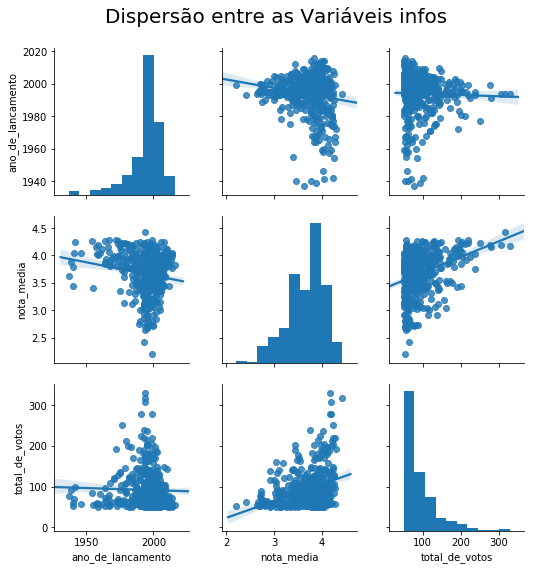

In [191]:
# solução
ax = sns.pairplot(infos, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis infos', fontsize=20, y=1.05)
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

In [206]:
infos_animations = filmes.query('Animation == 1')[["ano_de_lancamento", "nota_media", "total_de_votos"]]
infos_animations.head()

,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,
1,1995.0,3.920930,215.0
48,1995.0,3.147059,68.0
364,1994.0,3.941860,172.0
551,1993.0,3.553763,93.0
588,1992.0,3.792350,183.0


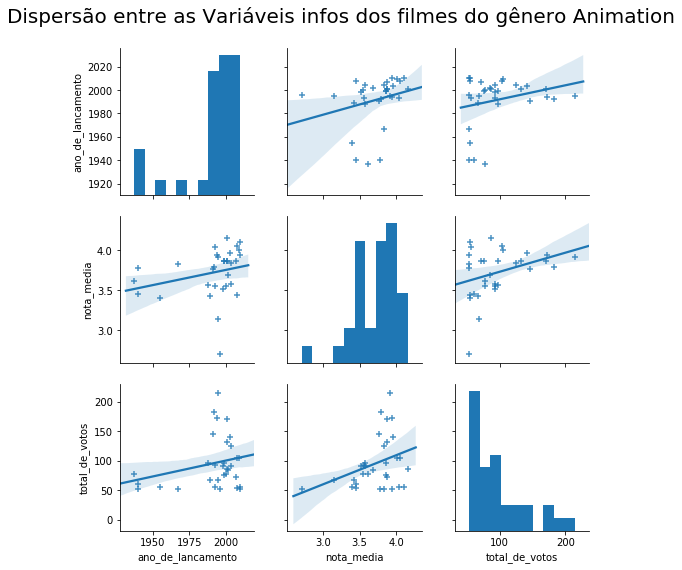

In [207]:
# solução
ax = sns.pairplot(infos_animations, kind = 'reg', palette = 'husl', markers="+")
ax.fig.suptitle('Dispersão entre as Variáveis infos dos filmes do gênero Animation', fontsize=20, y=1.05)
ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
A correlação entre a nota_media e o ano_de_lançamento de filmes Animation também parece linear para os filmes mais antigos. Apesar de se ter menos dados disponíveis, percebe-se uma linearidade nesses dados.

Sobre a correlação entre o ano_de_lançamento e o total_de_votos, o comportamento segue a mesma tendendia da descrita no paragrafo anterior. Tem-se menos dados disponiveis sobre os filmes com data de laçamento mais antigos, todavia, pode-se observar uma linearidade nessa relação.

Esse comportamento é semelhante para os outros filmes.

Percebe-se que a dispersão nos dados referentes aos filmes com data de lançamento mais antigos é bem menor que a dispersão dos filmes com data de lançamento mais recente. Apesar da escasses de dados referentes aos filmes com data de lançamento mais antigos, é possivel perceber uma linearidade nessas relações.

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

Text(0.5, 1.0, 'Distribuição da média das notas de acordo com o gênero')

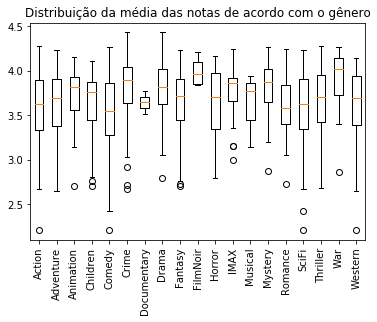

In [209]:
# solução
plt.boxplot([filmes.query('Action == 1').nota_media, filmes.query('Adventure == 1').nota_media, filmes.query('Animation == 1').nota_media, filmes.query('Children == 1').nota_media, filmes.query('Comedy == 1').nota_media, filmes.query('Crime == 1').nota_media, filmes.query('Documentary == 1').nota_media, filmes.query('Drama == 1').nota_media, filmes.query('Fantasy == 1').nota_media, filmes.query('FilmNoir == 1').nota_media, filmes.query('Horror == 1').nota_media, filmes.query('IMAX == 1').nota_media, filmes.query('Musical == 1').nota_media, filmes.query('Mystery == 1').nota_media, filmes.query('Romance == 1').nota_media, filmes.query('SciFi == 1').nota_media, filmes.query('Thriller == 1').nota_media, filmes.query('War == 1').nota_media, filmes.query('Western == 1').nota_media], labels = generos.columns)
plt.xticks(rotation=90)
plt.title("Distribuição da média das notas de acordo com o gênero")

Text(0.5, 1.0, 'Distribuição das notas dos 5 filmes mais bem votados entre os gêneros de Ação e Drama')

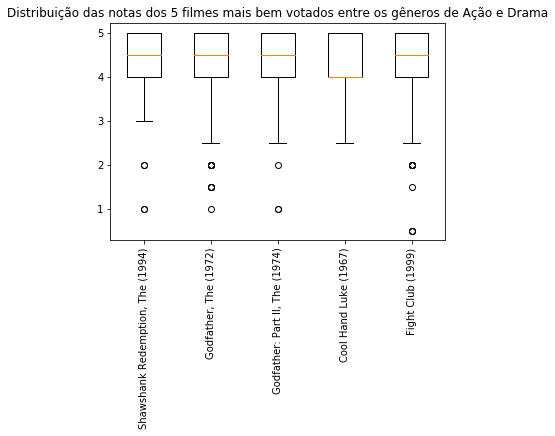

In [242]:
plt.boxplot([notas.query('filmeId == 318').nota, notas.query('filmeId == 858').nota, notas.query('filmeId == 1221').nota, notas.query('filmeId == 1276').nota, notas.query('filmeId == 2959').nota], labels=["Shawshank Redemption, The (1994)", "Godfather, The (1972)", "Godfather: Part II, The (1974)", "Cool Hand Luke (1967)", "Fight Club (1999)"])
plt.xticks(rotation=90)
plt.title("Distribuição das notas dos 5 filmes mais bem votados entre os gêneros de Ação e Drama")

Verifica-se uma alta dispersão entre as notas quando analisamos em função do gênero. Todavia, mesmo com essa alta dispersão percebe-se que uma tendencia da população dar notas acima de 2,5.
Quando se verifica apenas os filmes mais bem avaliados (no exemplo acima foram analisados os 5 filmes mais bem avaliados dos gêneros de Ação e Drama) é perceptível a elevadíssima distribuição das notas, onde as notas dadas se concentram na faixa entre 4 e 5.